# Cardiovascular Diseases Risk Prediction

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import normaltest

from sklearn import metrics, preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector as col_selector, ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [2]:
# set seed
np.random.seed(0)

# Introduction
## Problem
    Cardiovascular Disease (CVD) is the leading cause of death for people in the United States and one person dies every 33 seconds from this disease. Therefore, if we can find associations between different health indicators and heart disease, we can better predict CVD. With prediction comes prevention.
    
## Background
    This dataset was originally pulled from the Behavioral Risk Factor Surveillance System (BRFSS) which "is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services." [https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset] 19 key variables were taken from the original dataset and uploaded to Kaggle. 
    

https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

# Requirements
Required Python libraries are (from pip freeze of virtual environment):
anyio==3.7.0
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.2.1
attrs==23.1.0
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cffi==1.15.1
comm==0.1.3
contourpy==1.1.0
cycler==0.11.0
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
et-xmlfile==1.1.0
exceptiongroup==1.1.1
executing==1.2.0
fastjsonschema==2.17.1
fonttools==4.40.0
idna==3.4
imbalanced-learn==0.11.0
importlib-metadata==6.7.0
importlib-resources==5.12.0
ipykernel==6.23.2
ipython==8.12.2
ipython-genutils==0.2.0
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
jsonschema==4.17.3
jupyter-client==8.2.0
jupyter-core==5.3.1
jupyter-events==0.6.3
jupyter-server==2.6.0
jupyter-server-terminals==0.4.4
jupyterlab-pygments==0.2.2
kiwisolver==1.4.4
MarkupSafe==2.1.3
matplotlib==3.7.1
matplotlib-inline==0.1.6
mistune==3.0.1
nbclassic==1.0.0
nbclient==0.8.0
nbconvert==7.6.0
nbformat==5.9.0
nest-asyncio==1.5.6
notebook==6.5.4
notebook-shim==0.2.3
numpy==1.24.3
openpyxl==3.1.2
overrides==7.3.1
packaging==23.1
pandas==2.0.2
pandocfilters==1.5.0
parso==0.8.3
pexpect==4.8.0
pickleshare==0.7.5
Pillow==9.5.0
pkgutil-resolve-name==1.3.10
platformdirs==3.7.0
prometheus-client==0.17.0
prompt-toolkit==3.0.38
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
pycparser==2.21
Pygments==2.15.1
pyparsing==3.1.0
pyrsistent==0.19.3
python-dateutil==2.8.2
python-json-logger==2.0.7
pytz==2023.3
PyYAML==6.0
pyzmq==25.1.0
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
scikit-learn==1.2.2
scipy==1.10.1
seaborn==0.12.2
Send2Trash==1.8.2
six==1.16.0
sniffio==1.3.0
soupsieve==2.4.1
stack-data==0.6.2
terminado==0.17.1
threadpoolctl==3.1.0
tinycss2==1.2.1
tornado==6.3.2
traitlets==5.9.0
typing-extensions==4.6.3
tzdata==2023.3
wcwidth==0.2.6
webencodings==0.5.1
websocket-client==1.6.0
zipp==3.15.0

In [3]:
df = pd.read_csv('CVD_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

# Description

The Dataset contains 19 variables. 12 are numerical and 7 are categorical variables

#### General_Health
Would you say that in general your health is—

#### Checkup
About how long has it been since you last visited a doctor for a routine checkup?

#### Exercise
During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?

#### Heart_Disease
Respondents that reported having coronary heart disease or mycardialinfarction

#### Skin_Cancer
Respondents that reported having skin cancer

#### Other_Cancer
Respondents that reported having any other types of cancer

#### Depression
Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression)

#### Diabetes
Respondents that reported having a diabetes. If yes, what type of diabetes it is/was.

#### Arthritis
Respondents that reported having an Arthritis

#### Sex
Respondent's Gender

In [5]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## Feature Discovery

In [6]:
df['General_Health'].value_counts()

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

In [7]:
df['Checkup'].value_counts()

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

### Heart_Disease is the target feature
#### Binary categorical (Y/N) and Imbalanced

In [8]:
df['Heart_Disease'].count()

308854

In [9]:
total_yes_heart_disease = df[df['Heart_Disease']=='Yes']['Heart_Disease'].count()
total_heart_disease = df['Heart_Disease'].count()
print(f'The percentage of "Yes" for Heart Disease (target feature) in the dataset is {round((total_yes_heart_disease / total_heart_disease), 4) * 100}%')

The percentage of "Yes" for Heart Disease (target feature) in the dataset is 8.09%


In [10]:
df['Heart_Disease'].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

In [11]:
df['Skin_Cancer'].value_counts()

Skin_Cancer
No     278860
Yes     29994
Name: count, dtype: int64

In [12]:
df['Other_Cancer'].value_counts()

Other_Cancer
No     278976
Yes     29878
Name: count, dtype: int64

In [13]:
df['Depression'].value_counts()

Depression
No     246953
Yes     61901
Name: count, dtype: int64

In [14]:
df['Diabetes'].value_counts()

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [15]:
df['Arthritis'].value_counts()

Arthritis
No     207783
Yes    101071
Name: count, dtype: int64

In [16]:
df['Sex'].value_counts()

Sex
Female    160196
Male      148658
Name: count, dtype: int64

In [17]:
df['Age_Category'].value_counts()

Age_Category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '70-74'),
  Text(1, 0, '60-64'),
  Text(2, 0, '75-79'),
  Text(3, 0, '80+'),
  Text(4, 0, '65-69'),
  Text(5, 0, '50-54'),
  Text(6, 0, '45-49'),
  Text(7, 0, '18-24'),
  Text(8, 0, '30-34'),
  Text(9, 0, '55-59'),
  Text(10, 0, '35-39'),
  Text(11, 0, '40-44'),
  Text(12, 0, '25-29')])

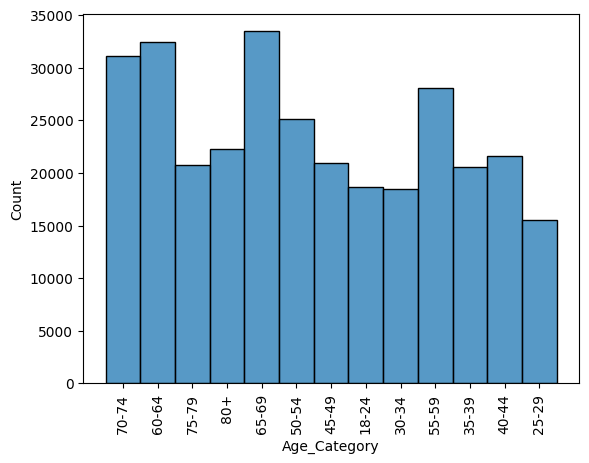

In [18]:
sns.histplot(data=df["Age_Category"])
plt.xticks(rotation=90)

### Notes
- The population tends to be older but there is good representation of age across the board

## Correlogram and Correlation Matrix

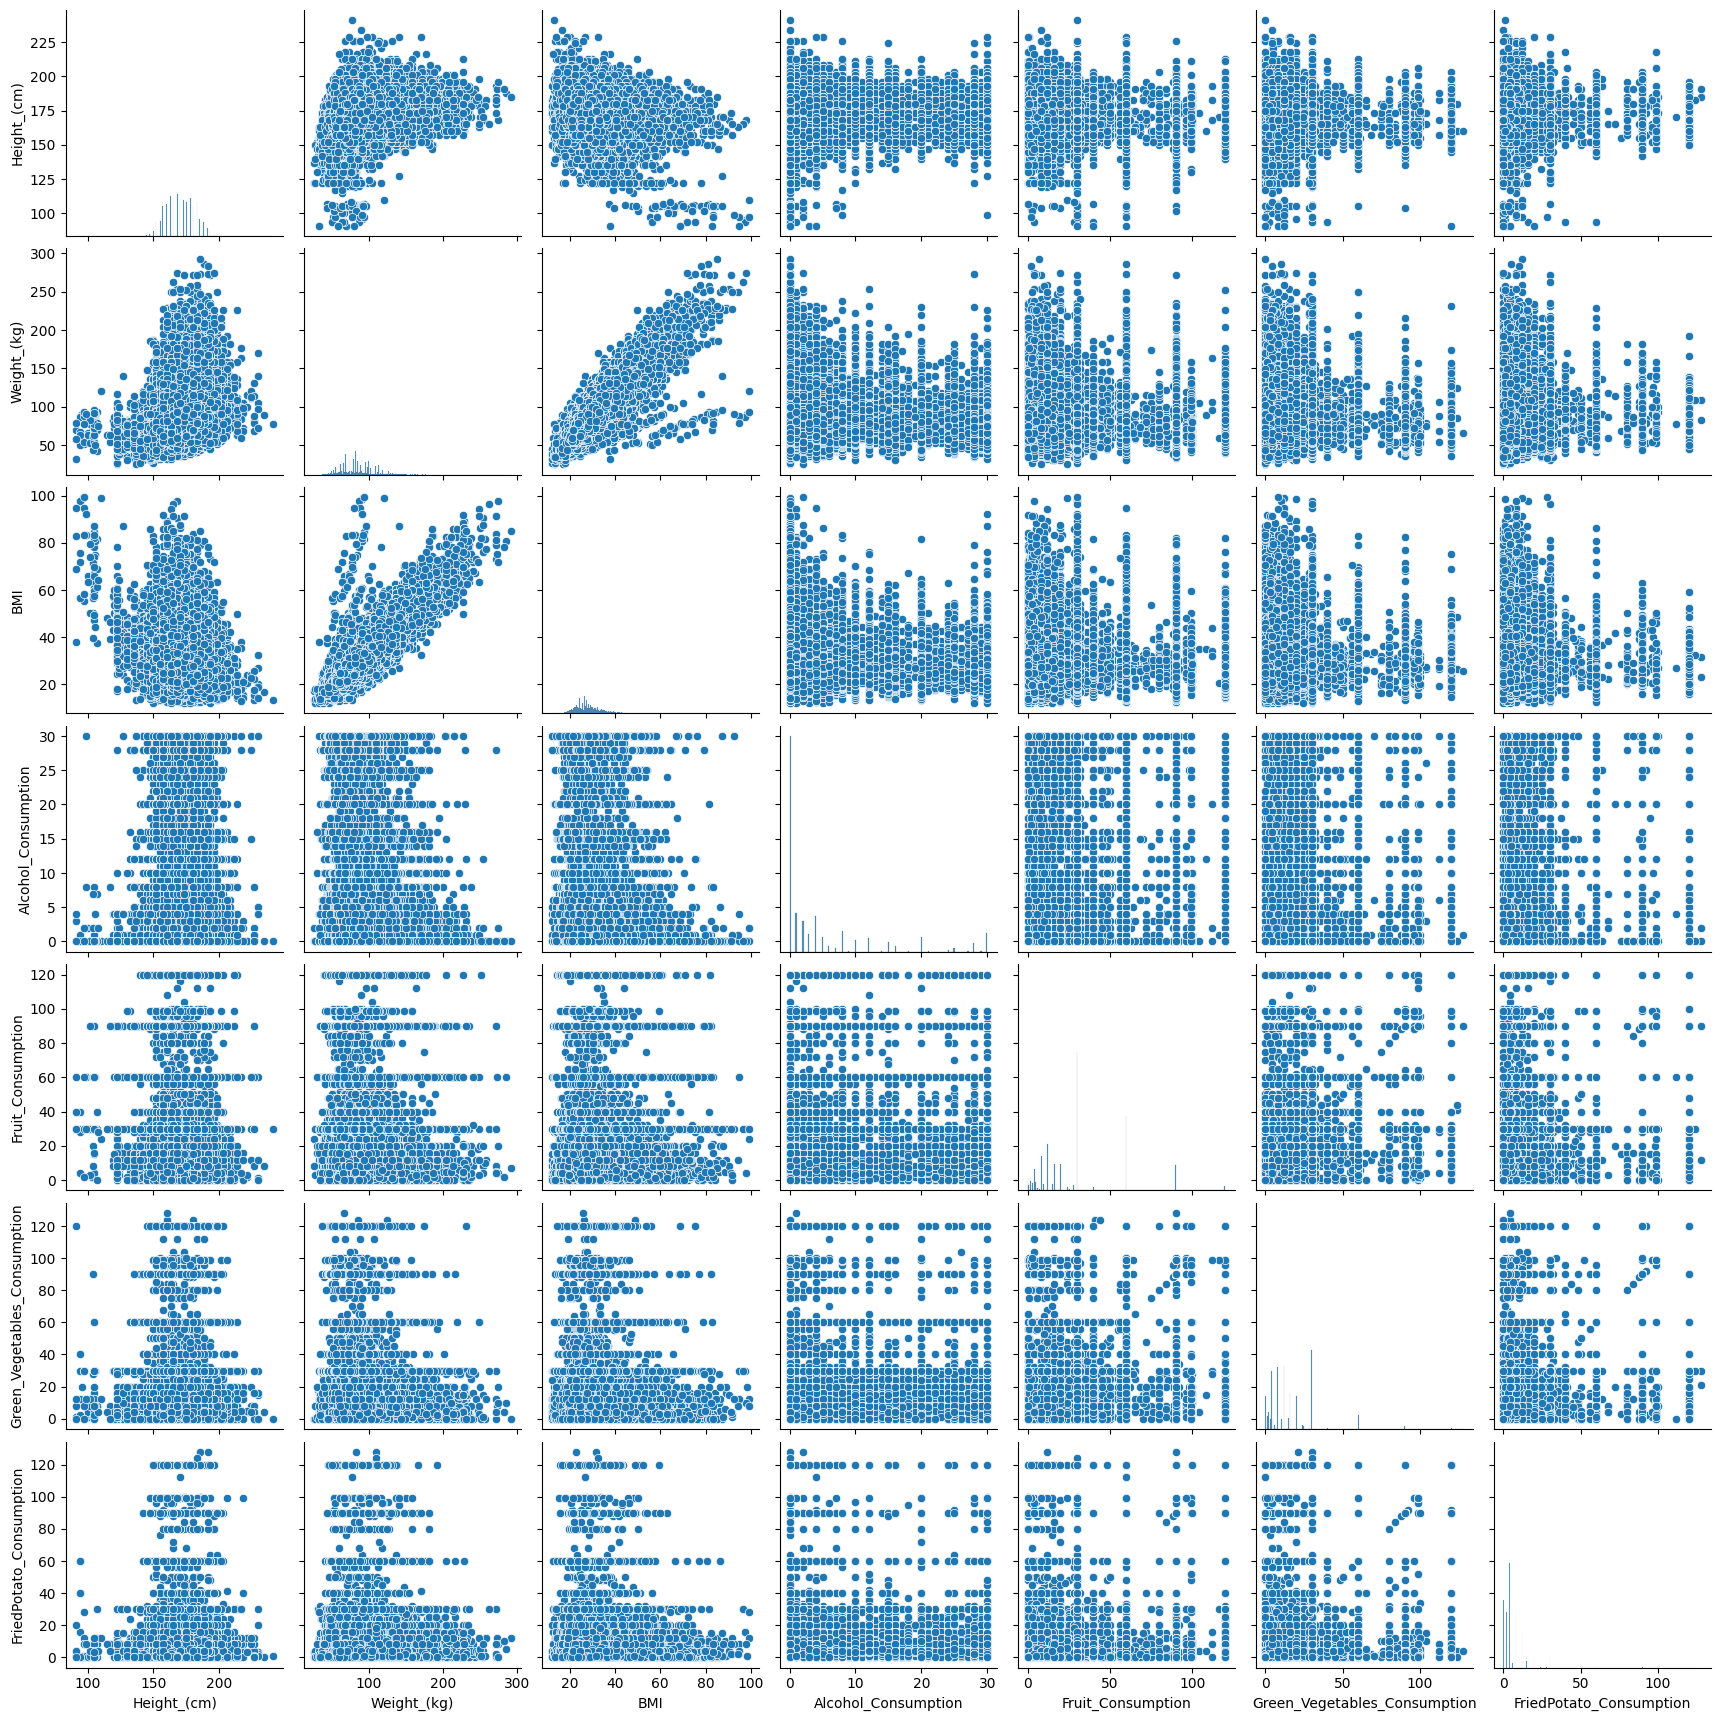

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
# use numeric features from dataset to create correlation matrix
correlation_features = df[['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]

(7.5, -0.5)

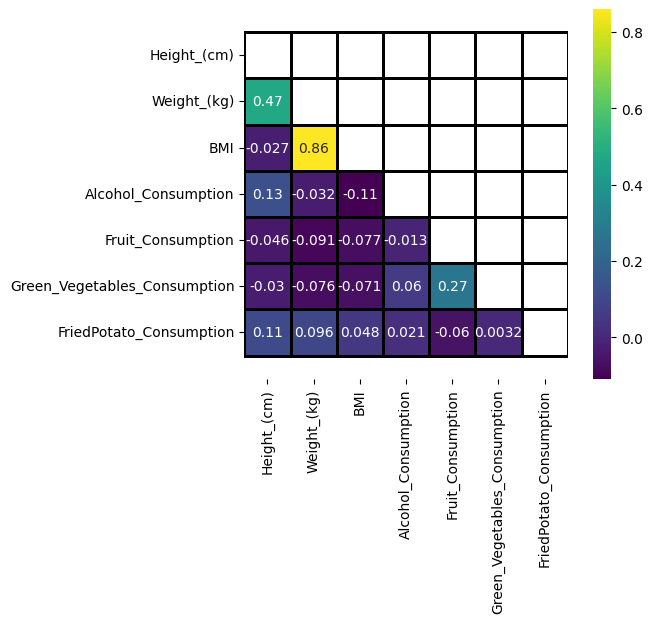

In [21]:
matrix = np.triu(correlation_features.corr())

ax = sns.heatmap(correlation_features.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', cmap='viridis', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Notes:
- There is a moderate positive correlation between weight and height, but not strong enough to exclude or combine these variables
- weight and BMI are highly correlated. I would consider removing BMI since it can be expressed by height and weight, which are both already present in the dataset
- there are no other strong correlations between variables in this dataset

## Normal Distribution Test

In [22]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

<Axes: xlabel='General_Health', ylabel='Count'>

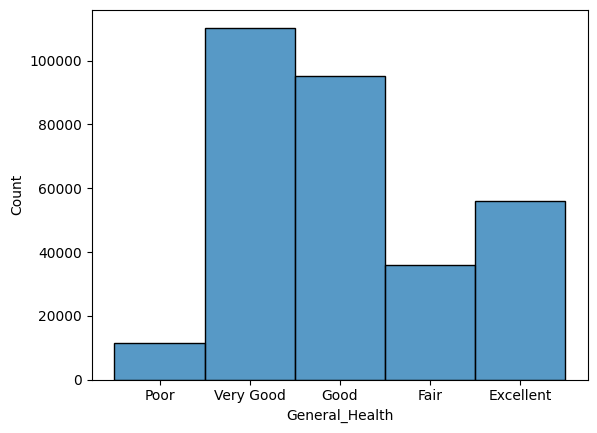

In [23]:
sns.histplot(data=df["General_Health"], binwidth=5)

<Axes: xlabel='Checkup', ylabel='Count'>

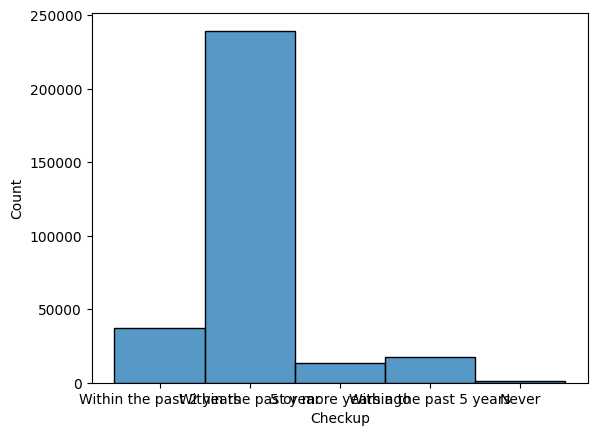

In [24]:
sns.histplot(data=df["Checkup"], binwidth=5)

<Axes: xlabel='Age_Category', ylabel='Count'>

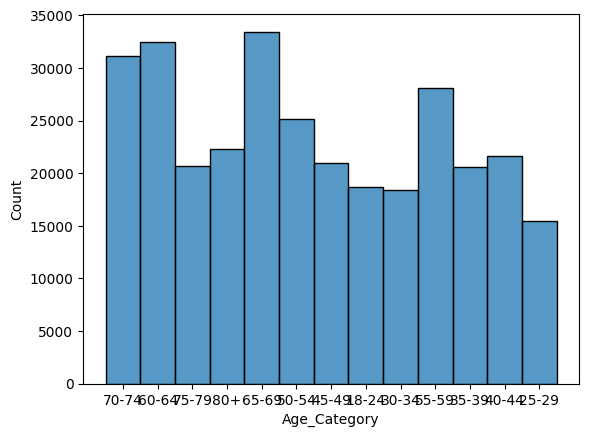

In [25]:
sns.histplot(data=df["Age_Category"], binwidth=5)

<Axes: xlabel='Height_(cm)', ylabel='Count'>

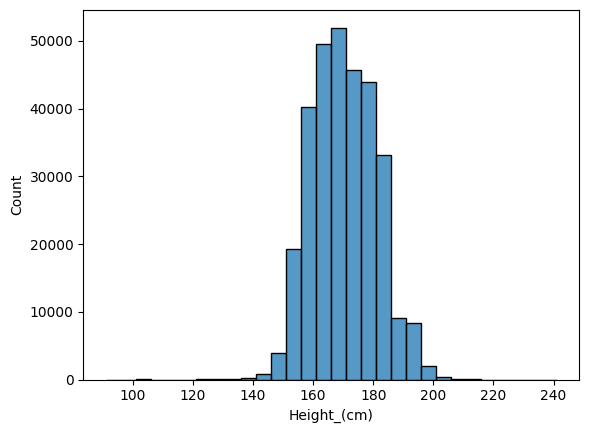

In [26]:
sns.histplot(data=df["Height_(cm)"], binwidth=5)

<Axes: xlabel='Weight_(kg)', ylabel='Count'>

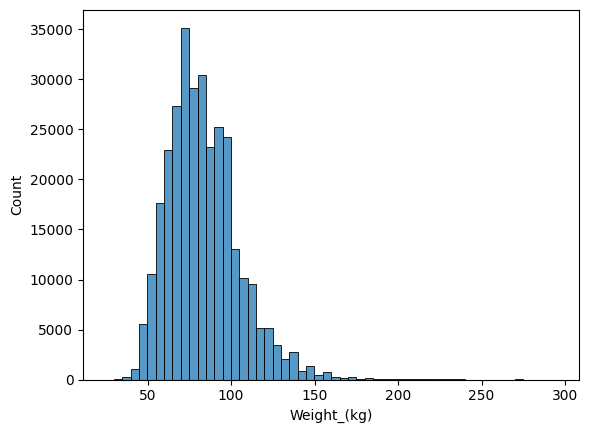

In [27]:
sns.histplot(data=df["Weight_(kg)"], binwidth=5)

In [28]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [29]:
for var in ['Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']:
    # Shapiro Wilk Test
    shapiro = stats.shapiro(df[var]) 
    print(shapiro)
    
    # K^2 Test
    stat, p = normaltest(df[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

ShapiroResult(statistic=0.9879143238067627, pvalue=0.0)
Statistics=12.498, p=0.002
ShapiroResult(statistic=0.949349045753479, pvalue=0.0)
Statistics=58417.891, p=0.000
ShapiroResult(statistic=0.6660206317901611, pvalue=0.0)
Statistics=103462.275, p=0.000
ShapiroResult(statistic=0.8532854318618774, pvalue=0.0)
Statistics=58403.091, p=0.000
ShapiroResult(statistic=0.7758669853210449, pvalue=0.0)
Statistics=163686.766, p=0.000
ShapiroResult(statistic=0.6107176542282104, pvalue=0.0)
Statistics=310812.178, p=0.000


/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### The p-value for all the numeric features is < 0.05, so these are not normally distributed
### Min-Max scaling will be used for these features 

## Separate features from label

In [30]:
df_y = df["Heart_Disease"]
df_x = df.drop(columns=["Heart_Disease", 'BMI'])
df_copy = df.copy(deep=True)

## Get categorical and numeric features

In [31]:
# categorical_cols_obj is a categorical object
categorical_cols_obj = col_selector(dtype_include=object)
# print(type(categorical_cols_obj))

# categorical_features is a list of  column names of features with catergorical data
categorical_features = categorical_cols_obj(df_x)
# print(type(categorical_features))

# numeric_features is a list of column names of features with numeric data
int_cols_obj = col_selector(dtype_include="float64")
numeric_features = int_cols_obj(df_x)

print(f"Categorical features: {categorical_features}\n")
print(f"Numeric features: {numeric_features}")

Categorical features: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

Numeric features: ['Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


## Apply Label Encoder to target

In [32]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df_y)

## Apply Logistic Regression
## Pipeline for encoding/scaling 

In [33]:
# features
x = df_x

# apply Standard Scaler on numerical features and
# apply One Hot Encoder on categorical features
preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features),
               ('cat', OneHotEncoder(), categorical_features)])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.919


### Notes:
The model accuracy is 91.9%
Initially, this looks good, but it's important to remember that we're dealing with an imbalanced dataset
We will see how the model performs using a confusion matrix and classification report

## Confusion Matrix

[[56491   292]
 [ 4685   303]]


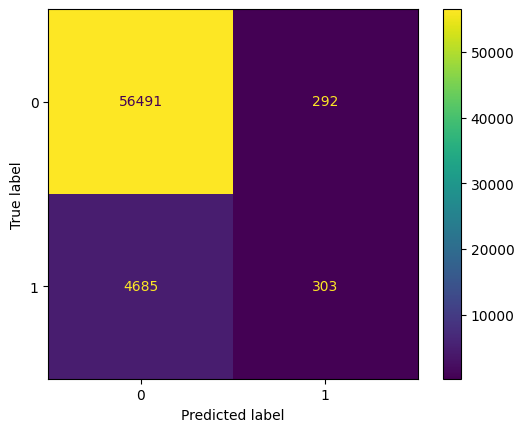

In [34]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Classification Report

In [35]:
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56783
           1       0.51      0.06      0.11      4988

    accuracy                           0.92     61771
   macro avg       0.72      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771

Accuracy: 0.91942821064901


## AUC / ROC

Logistic AUC = 0.84


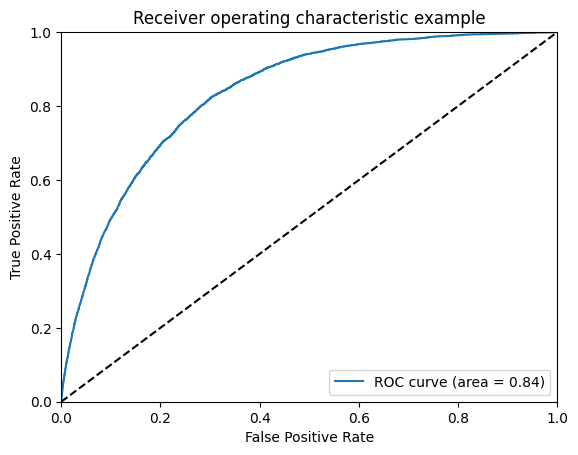

In [36]:
y_prob = clf.predict_proba(x_test)
y_prob = y_prob[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_prob)
print("Logistic AUC = %0.2f" %logit_roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Balance the data and repeat logistic regression

In [37]:
# create a subsample that has balanced data

# shuffle the dataset
df_shuffle = df_copy.sample(frac=1, random_state=42) 

cvd_df = df_shuffle.loc[df_shuffle["Heart_Disease"]=='Yes']

n_samples = cvd_df.shape[0]

no_cvd_df = df_shuffle.loc[df_shuffle["Heart_Disease"]=='No'][:n_samples]

new_concat = pd.concat([cvd_df, no_cvd_df])

# shuffle the rows in the dataframe 
new_df = new_concat.sample(frac=1, random_state=42)

new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 49942 entries, 225219 to 221650
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                49942 non-null  object 
 1   Checkup                       49942 non-null  object 
 2   Exercise                      49942 non-null  object 
 3   Heart_Disease                 49942 non-null  object 
 4   Skin_Cancer                   49942 non-null  object 
 5   Other_Cancer                  49942 non-null  object 
 6   Depression                    49942 non-null  object 
 7   Diabetes                      49942 non-null  object 
 8   Arthritis                     49942 non-null  object 
 9   Sex                           49942 non-null  object 
 10  Age_Category                  49942 non-null  object 
 11  Height_(cm)                   49942 non-null  float64
 12  Weight_(kg)                   49942 non-null  float64
 13  

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
225219,Excellent,Within the past 5 years,Yes,No,No,No,No,No,No,Male,18-24,185.0,83.91,24.41,No,8.0,12.0,8.0,24.0
143111,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,18-24,170.0,99.79,34.46,No,0.0,60.0,0.0,7.0
137268,Good,Within the past year,No,No,No,Yes,Yes,Yes,No,Female,60-64,173.0,95.25,31.93,No,0.0,60.0,0.0,4.0
80258,Very Good,Within the past year,Yes,No,No,No,Yes,Yes,No,Female,30-34,168.0,136.08,48.42,Yes,0.0,12.0,10.0,5.0
132374,Good,Within the past 2 years,Yes,Yes,Yes,No,No,No,Yes,Male,75-79,168.0,81.65,29.05,Yes,1.0,2.0,0.0,4.0


## Repeat Logistic Regression with the balanced dataset

In [38]:
df_y = new_df["Heart_Disease"]
df_x = new_df.drop(["Heart_Disease", 'BMI'], axis=1)
df_copy = new_df.copy(deep=True)

In [39]:
# categorical_cols_obj is a categorical object
categorical_cols_obj = col_selector(dtype_include=object)
# print(type(categorical_cols_obj))

# categorical_features is a list of  column names of features with catergorical data
categorical_features = categorical_cols_obj(df_x)
# print(type(categorical_features))

# numeric_features is a list of column names of features with numeric data
int_cols_obj = col_selector(dtype_include="float64")
numeric_features = int_cols_obj(df_x)

print(f"Categorical features: {categorical_features}\n")
print(f"Numeric features: {numeric_features}")

Categorical features: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

Numeric features: ['Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [40]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df_y)

In [41]:
# features
x = df_x

# apply MinMax Scaler on numerical features and
# apply One Hot Encoder on categorical features
preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features),
               ('cat', OneHotEncoder(), categorical_features)])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.761


## Notes
Model score is worse, but let's look at the other metrics

[[3760 1370]
 [1015 3844]]


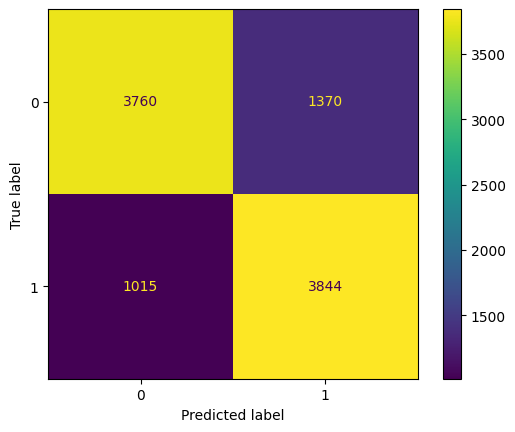

In [42]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Notes
The confusion matrix has improved compared to the imbalanced version

In [43]:
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5130
           1       0.74      0.79      0.76      4859

    accuracy                           0.76      9989
   macro avg       0.76      0.76      0.76      9989
weighted avg       0.76      0.76      0.76      9989

Accuracy: 0.761237361097207


## Note
- Accuracy is worse compared to the imbalanced set
- But precision, recall, and the f1-score have all improved overall

Logistic AUC = 0.84


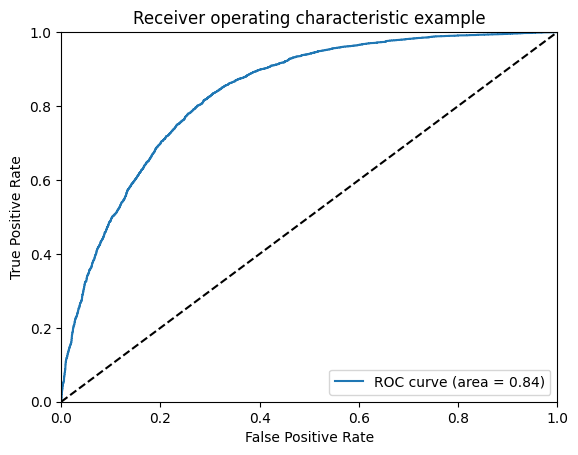

In [44]:
y_prob = clf.predict_proba(x_test)
y_prob = y_prob[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_prob)
print("Logistic AUC = %0.2f" %logit_roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [45]:
x = df_x

preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features),
               ('cat', OneHotEncoder(), categorical_features)])

clf = make_pipeline(preprocessor, DecisionTreeClassifier())

xdr_train, xdr_test, ydr_train, ydr_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(xdr_train, ydr_train)
print("model score: %.3f" % clf.score(xdr_test, ydr_test))

model score: 0.664


              precision    recall  f1-score   support

           0       0.68      0.67      0.67      5130
           1       0.65      0.66      0.66      4859

    accuracy                           0.66      9989
   macro avg       0.66      0.66      0.66      9989
weighted avg       0.66      0.66      0.66      9989



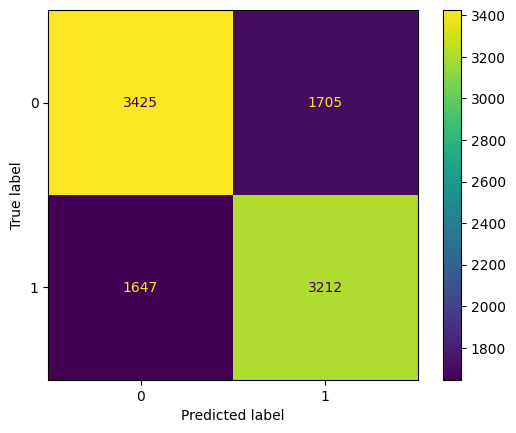

In [46]:
predict = clf.predict(xdr_test)

class_report = classification_report(ydr_test, predict)
print(class_report)

cm = confusion_matrix(ydr_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Logistic AUC = 0.66


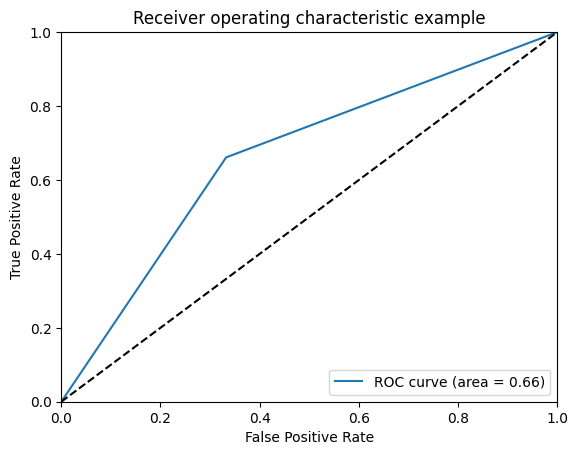

In [47]:
y_prob = clf.predict_proba(xdr_test)
y_prob = y_prob[:, 1]
logit_roc_auc = roc_auc_score(ydr_test, y_prob)
print("Logistic AUC = %0.2f" %logit_roc_auc)

fpr, tpr, threshold = roc_curve(ydr_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [48]:
x = df_x

preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features),
               ('cat', OrdinalEncoder(), categorical_features)])

clf = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=200))

xdr_train, xdr_test, ydr_train, ydr_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(xdr_train, ydr_train)
print("model score: %.3f" % clf.score(xdr_test, ydr_test))

model score: 0.750


              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5130
           1       0.72      0.80      0.76      4859

    accuracy                           0.75      9989
   macro avg       0.75      0.75      0.75      9989
weighted avg       0.75      0.75      0.75      9989



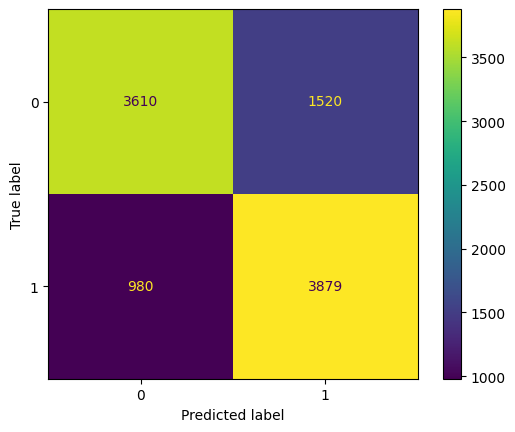

In [49]:
predict = clf.predict(xdr_test)

class_report = classification_report(ydr_test, predict)
print(class_report)

cm = confusion_matrix(ydr_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Logistic AUC = 0.82


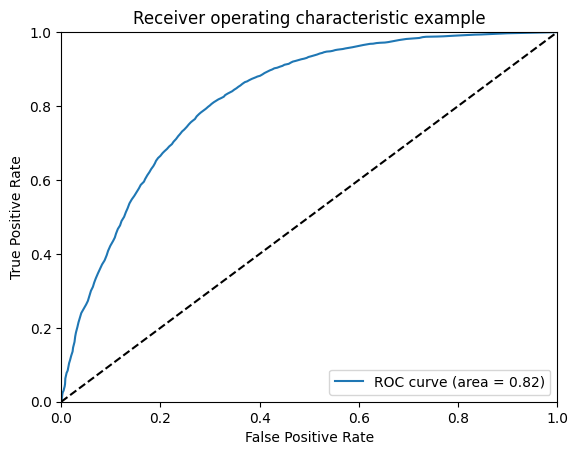

In [50]:
y_prob = clf.predict_proba(xdr_test)
y_prob = y_prob[:, 1]
logit_roc_auc = roc_auc_score(ydr_test, y_prob)
print("Logistic AUC = %0.2f" %logit_roc_auc)

fpr, tpr, threshold = roc_curve(ydr_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [51]:
feature_importances = clf.named_steps['randomforestclassifier'].feature_importances_
feature_importances

array([0.08800895, 0.12241202, 0.06005576, 0.08064388, 0.08286214,
       0.07890215, 0.08639309, 0.02339494, 0.01813744, 0.0144221 ,
       0.01598597, 0.01662705, 0.0451217 , 0.03700437, 0.02152348,
       0.18298634, 0.0255186 ])

In [52]:
x.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')


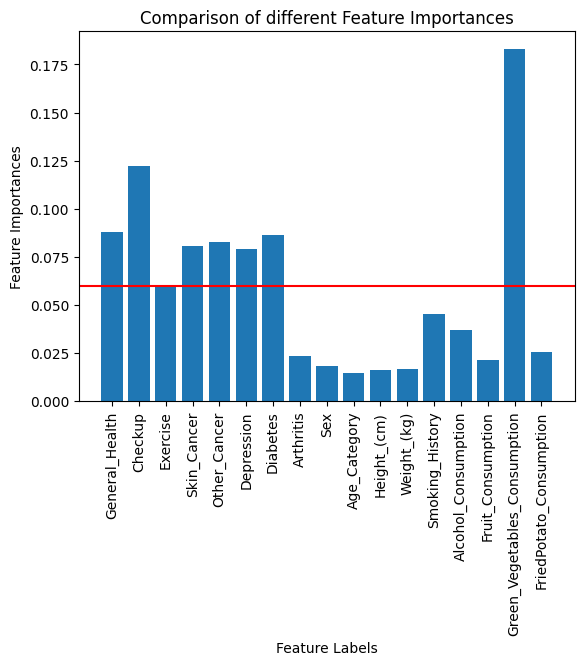

In [53]:
# Plotting a Bar Graph to look for Feature Importances
features = x.columns
print(features)
plt.bar(features, feature_importances) 
plt.xlabel('Feature Labels')
plt.xticks(rotation=90)
plt.ylabel('Feature Importances')
plt.axhline(y=0.06, color='r')
plt.title('Comparison of different Feature Importances')
plt.show()

### Notes
- The important features from this initial random forest are mostly the categorical variables and green vegetable consumption
- Interestingly, this is different from the important features found in the upcoming section

### Feature Importance using Extra Trees Classifier
#### I want to see if a smaller subset of select features can improve our previous models

In [54]:
x_feat = x.copy(deep=True)

In [55]:
# Data prep
categorical_cols_obj = col_selector(dtype_include=object)
categorical_features_mat = categorical_cols_obj(x_feat)
print(categorical_features)

int_cols_obj = col_selector(dtype_include="float")
numeric_features_mat = int_cols_obj(x_feat)
print(numeric_features)

df_cat = x_feat[categorical_features]

ob_encoder = preprocessing.OrdinalEncoder()
cat_encoded = ob_encoder.fit_transform(df_cat)

x_final_feat = np.hstack([cat_encoded, np.array(x_feat[numeric_features])])

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
['Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


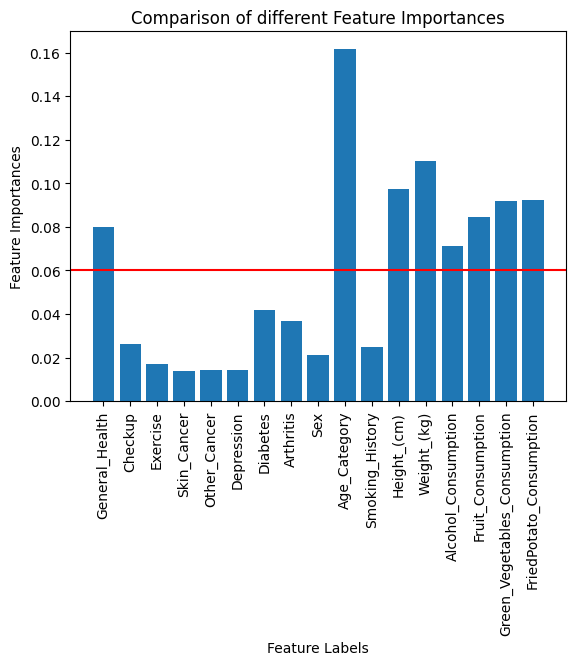

In [56]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 50, criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(x_final_feat, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Plotting a Bar Graph to show feature importance
features = categorical_features + numeric_features
print(features)
plt.bar(features, feature_importance) 
plt.xlabel('Feature Labels')
plt.xticks(rotation=90)
plt.ylabel('Feature Importances')
plt.axhline(y=0.06, color='r')
plt.title('Comparison of different Feature Importances')
plt.show()

### Notes
- Genearl Health, Age Category, Height, Weight, Alcohol Consumption, Fruit Consumption, Green Vegetable Consumption, and Fried Potato Consumption appear to be the most important features from this Extra Trees Classifier 
- Interestingly, these don't overlap with the Random Forest important features
- I'll try the random forest and logistic regression models again with these features only

In [57]:
important_features = ['General_Health', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [58]:
x = df_x[important_features]
numeric_features_update = numeric_features
categorical_features_update = ['General_Health', 'Age_Category']


preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features_update),
               ('cat', OneHotEncoder(), categorical_features_update)])

clf = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=200))

xdr_train, xdr_test, ydr_train, ydr_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(xdr_train, ydr_train)
print("model score: %.3f" % clf.score(xdr_test, ydr_test))

model score: 0.730


In [59]:
predict = clf.predict(xdr_test)

class_report = classification_report(ydr_test, predict)
print(class_report)

cm_tree = confusion_matrix(ydr_test, predict)
print(cm_tree)

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      5130
           1       0.70      0.77      0.73      4859

    accuracy                           0.73      9989
   macro avg       0.73      0.73      0.73      9989
weighted avg       0.73      0.73      0.73      9989

[[3552 1578]
 [1121 3738]]


In [60]:

preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features_update),
               ('cat', OneHotEncoder(), categorical_features_update)])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.746


### Notes
- The Random Forest and Logistic Regression models with fewer features did not improve performance
- I'll continue to use the full feature list

## SVM

In [61]:
x = df_x

preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features_update),
               ('cat', OneHotEncoder(), categorical_features_update)])

clf = make_pipeline(preprocessor, SVC(kernel='linear'))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.719


              precision    recall  f1-score   support

           0       0.76      0.69      0.72      5130
           1       0.70      0.77      0.73      4859

    accuracy                           0.73      9989
   macro avg       0.73      0.73      0.73      9989
weighted avg       0.73      0.73      0.73      9989



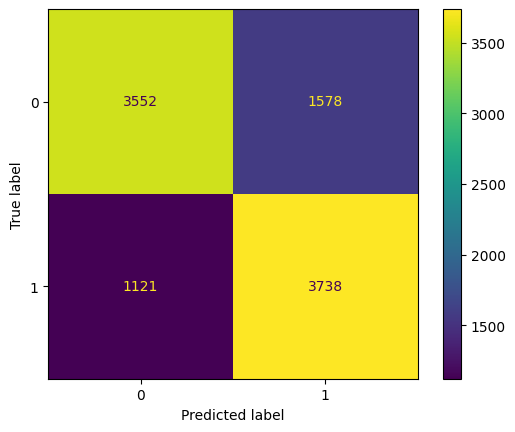

In [62]:
y_pred = clf.predict(x_test)

class_report = classification_report(y_test, predict)
print(class_report)

cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Naive Bayes

In [63]:
x = df_x

preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features_update),
               ('cat', OneHotEncoder(), categorical_features_update)])

clf = make_pipeline(preprocessor, GaussianNB())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.708


              precision    recall  f1-score   support

           0       0.76      0.69      0.72      5130
           1       0.70      0.77      0.73      4859

    accuracy                           0.73      9989
   macro avg       0.73      0.73      0.73      9989
weighted avg       0.73      0.73      0.73      9989



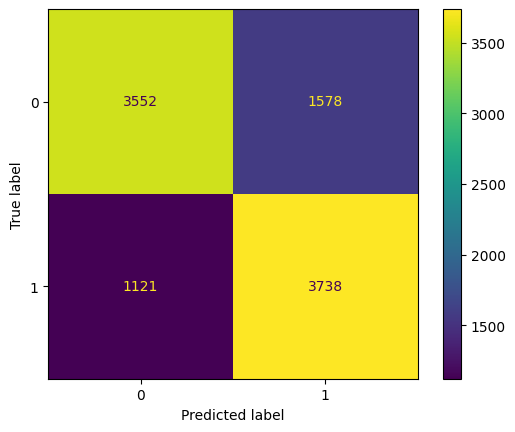

In [64]:
y_pred = clf.predict(x_test)

class_report = classification_report(y_test, predict)
print(class_report)

cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Logistic AUC = 0.80


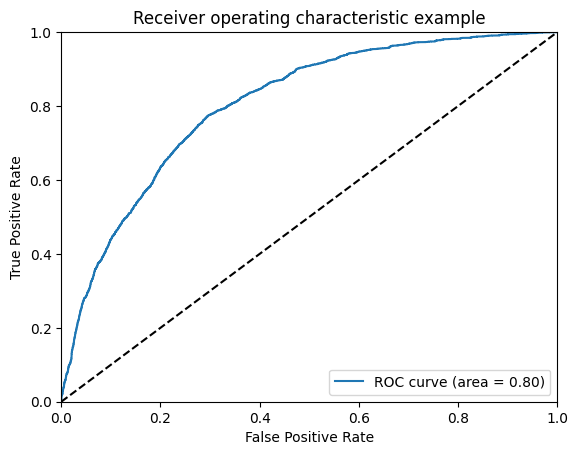

In [65]:
y_prob = clf.predict_proba(x_test)
y_prob = y_prob[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_prob)
print("Logistic AUC = %0.2f" %logit_roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## KNN

In [66]:
k_range = range(1, 20)
scores_list = []

for k in k_range:
    x = df_x

    preprocessor = ColumnTransformer(
                   transformers=[
                   ('num', MinMaxScaler(), numeric_features_update),
                   ('cat', OneHotEncoder(), categorical_features_update)])

    clf = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                        random_state=0)

    clf.fit(x_train, y_train)
    print("model score: %.3f" % clf.score(x_test, y_test))
    
    y_pred = clf.predict(xdr_test)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

model score: 0.658
model score: 0.653
model score: 0.696
model score: 0.687
model score: 0.713
model score: 0.707
model score: 0.721
model score: 0.717
model score: 0.723
model score: 0.721
model score: 0.726
model score: 0.723
model score: 0.732
model score: 0.730
model score: 0.733
model score: 0.730
model score: 0.734
model score: 0.733
model score: 0.736


In [67]:
print(scores_list)

[0.6580238262088297, 0.6525177695465012, 0.6962658924817299, 0.6868555410952047, 0.7134848333166484, 0.7070777855641205, 0.7207928721593753, 0.7170887976774452, 0.7228951847031735, 0.7211933126439083, 0.7255981579737711, 0.7231955150665732, 0.7322054259685654, 0.7298027830613675, 0.7326058664530984, 0.7301031134247672, 0.7340074081489638, 0.7329061968164982, 0.7360096105716288]


Text(0, 0.5, 'Test Accuracy')

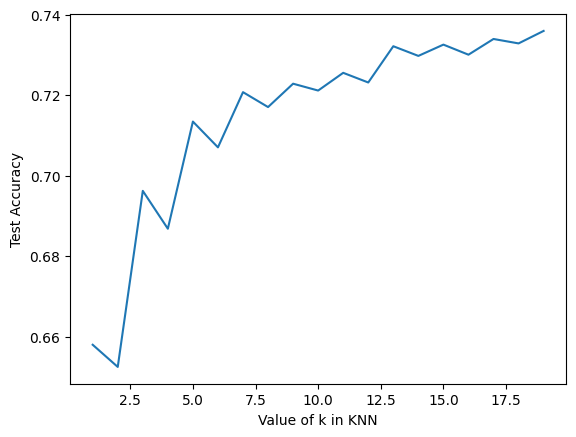

In [68]:
%matplotlib inline
plt.plot(k_range, scores_list)
plt.xlabel("Value of k in KNN")
plt.ylabel("Test Accuracy")

### Notes
- The Accuracy is trending up and doesn't dip
- More K's can be tested

### Using n_neighbors (k) = 20

In [69]:
k=20
preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features_update),
               ('cat', OneHotEncoder(), categorical_features_update)])

clf = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.736


              precision    recall  f1-score   support

           0       0.76      0.69      0.72      5130
           1       0.70      0.77      0.73      4859

    accuracy                           0.73      9989
   macro avg       0.73      0.73      0.73      9989
weighted avg       0.73      0.73      0.73      9989



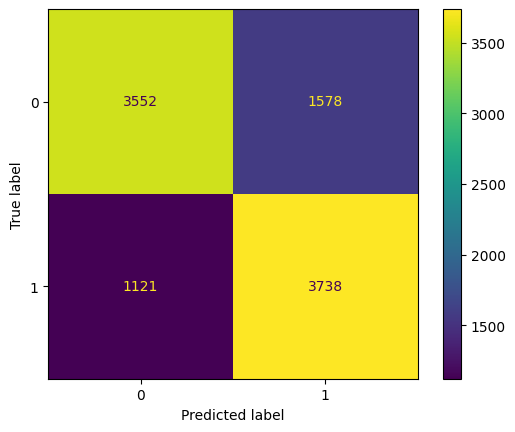

In [70]:
y_pred = clf.predict(x_test)

class_report = classification_report(y_test, predict)
print(class_report)

cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Logistic AUC = 0.81


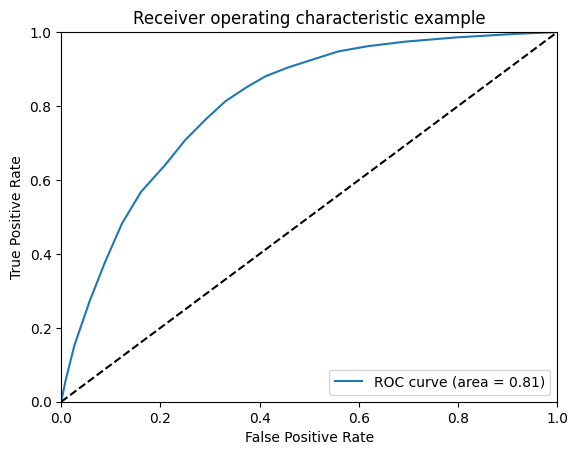

In [71]:
y_prob = clf.predict_proba(x_test)
y_prob = y_prob[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_prob)
print("Logistic AUC = %0.2f" %logit_roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Conclusion
    In general, the performance of the models were all similar to each other. But the clear winner was the Logistic Regression model with 500 max iterations. I found that it worked best when the dataset was balanced and all original features were used (with One Hot Encoding and Min Max Encoding for the appropriate features). It was able to predict CVD with 
    an accuracy of 0.76
    an F1 score of 0.76
    and an AUC of 0.84

    I'm happy with these results given that it closely matches the findings from a paper that used this dataset to do a similar prediction [https://eajournals.org/ejcsit/wp-content/uploads/sites/21/2023/06/Integrated-Machine-Learning.pdf].

    I also found that 'General_Health', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', and 'FriedPotato_Consumption' features stood out as being important based on the Extra Trees Classifier. In this case, it didn't improve the performance of the Logistic Regression, so I decided to keep all the original features. But these findings are significant in that it can help clinicians prevent patients with these variables from suffering from CVD and potentially help build more ML models.
    
    It would be worth exploring more hyperparameter tuning using GridSearchCV or RandomSearchCV. But based on the results of my other models, I did not expect much more gain from this pursuit. It may be worthwhile (and fun) to try using Gradient Boosting and PCA to see if we can improve performance.